# $$Computational Lab 3$$

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Root finding 2- Newton Rapson**
Solve the equation $f(x)= x^3 -0.165x^2+3.993*10^{-4}$
using Newton-Raphson methodfor a given error limit of e = 0.0001.

In [66]:
def func(x):
    return x**3 - 0.165*x**2 + 3.993*1e-4

def derivative(x):
    return (3*x**2 - 0.165*x*2)

def newton_rapson(f,guess,error):
    x=guess
    x_old=x+10
    
    while(abs(x_old-x) >error):
        
        if(derivative(x)==0):
            return 'Derivative is 0, so choose another guess'
        x_old=x
        x=x-f(x)/derivative(x)
    return x

def recursive_newton_rapson(f,guess,error):
    x=guess
    if(derivative(x)==0):
        return 'Take a new guess,derivative is 0'
    if (abs(f(x))<error):
        return x
    return recursive_newton_rapson(f,x-f(x)/derivative(x),error)

**1) Intial guess of x= 0.05**

In [67]:
newton_rapson(func,0.05,1e-4)

0.062377576543465846

In [68]:
recursive_newton_rapson(func,0.05,1e-4)

0.06242222222222221

**2) Initial Guess is x= 0.11**

In [69]:
newton_rapson(func,0.11,1e-4)

'Derivative is 0, so choose another guess'

In [70]:
recursive_newton_rapson(func,0.11,1e-4)

'Take a new guess,derivative is 0'

In [71]:
x=np.arange(-0.1,0.2,1e-3)
y=func(x)

The derivative at x=0.11 is 0.0


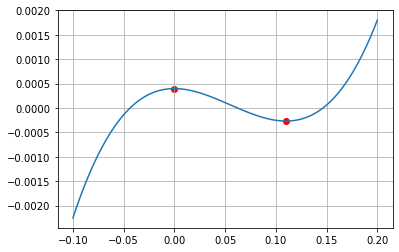

In [72]:
plt.plot(x,y)
plt.scatter([0.11,0],[func(0.11),func(0)],color='red')
plt.grid()
print(f"The derivative at x=0.11 is {derivative(0.11)}")

The second guess does not offer any solution because the derivatie is 0 at x=0.11 as we can see, so we have to take another guess

**3) Yes we can find another initial guess which does not lead to any solution, it is where func'(x)=0 i.e where the derivative of the function is 0 which is at x=0**

In [73]:
print(f"The derivative of the function at x=0 is {derivative(0)}")

The derivative of the function at x=0 is 0.0


**4) Plotting number of steps vs error**

In [74]:
def newton_rapson_steps(f,guess,error):
    x=guess
    x_old=x+10
    steps=0
    while(abs(x_old-x) >error):
        
        if(derivative(x)==0):
            return 'Derivative is 0, so choose another guess'
        steps+=1
        x_old=x
        x=x- f(x)/derivative(x)
    return x,steps

Text(0, 0.5, 'Number of steps')

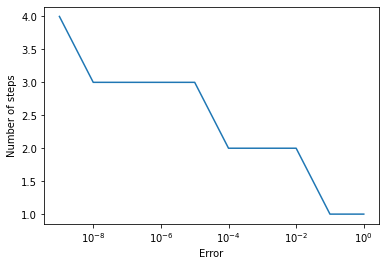

In [88]:
steps=[]
e=[]
for i in range (10):
    error=10**(-i)
    e.append(error)
    x,step=newton_rapson_steps(func,0.05,error)
    steps.append(step)
    
plt.plot(e,steps)
plt.xscale('log')
plt.xlabel('Error')
plt.ylabel('Number of steps')

We can see that as the error increases, the number of steps required for convergence decreases

# **Finding reciprocal of a number by newton rapson**

**a) Code to find the reciprocal of a number by newton rapson method in given number of iterations (50) here**

finding the reciprocal of a

In [76]:
def f1(x,a):
    return (1/x) - a

def der_f(x):
    return -1/(x**2)

In [77]:
def newton_rapson2(a,guess,n):
    
    x=guess
    for i in range(n):
        x=x-f1(x,a)/der_f(x)
        
    return x

In [78]:
a=11
iterations=50
guess=0.001

newton_rapson2(a,guess,iterations)

0.09090909090909091

*b) error propogation as a function of the number of iterations*

In [79]:
error=[]
iterations=[]
for i in range(20):
    error.append(abs(newton_rapson2(10,0.001,i)-0.1))
    iterations.append(i)
    

Text(0, 0.5, 'Error')

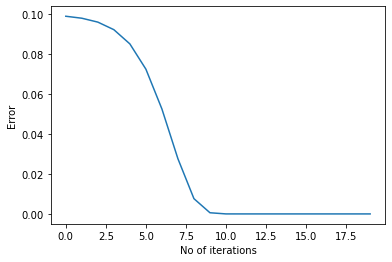

In [80]:
plt.plot(iterations,error)
plt.xlabel('No of iterations')
plt.ylabel('Error')

We can see that with increasing number of iterations the error decreases

# Diagonal dominance of matrix

In [81]:
A=np.array([[-6,2,1,2,1],[3,8,-4,1,0],[-1,1,4,10,1],[3,-4,1,9,2],[2,0,1,3,10]])

In [82]:
B=np.array([[18,3,6,-2],[9,13,-5,2],[-3,-2,4,9],[6,0,11,3]])

In [83]:
def dominant(a):
    m,n=np.shape(a)
    flag=0
    for i in range(m):
        if((np.sum(abs(a[i]))-abs(a[i][i]))>abs(a[i][i])):
            print(f"Not strictly diagonally dominant on row {i+1}")
            flag=-1
      
    if(flag==0):
        return 'Dominant row'
        

In [84]:
dominant(A)

Not strictly diagonally dominant on row 3
Not strictly diagonally dominant on row 4


In [89]:
dominant(B)

Not strictly diagonally dominant on row 2
Not strictly diagonally dominant on row 3
Not strictly diagonally dominant on row 4
